# For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
#import data
df = pd.read_csv('Iris .csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
mp = {'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica':2 }
df['Species'] = df["Species"].apply(lambda x: mp.get(x))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [4]:
X = df.iloc[:, 1:5]
y = df.Species

In [5]:
#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, df.Species, test_size=0.2, random_state=42)

In [6]:
#train the model
dec_cls = DecisionTreeClassifier(max_depth=2)
dec_cls.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
#predict for test data and measure accuracy
accuracy = dec_cls.score(X_test, y_test)
print(accuracy)

0.9666666666666667


## Tweaking the depth to imporve accuracy

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Depth')]

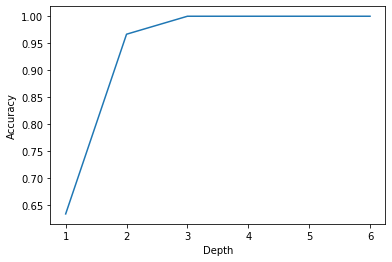

In [8]:
Depths = [i for i in range(1,7)]
acc_score = []
for i in Depths:
    dec_cls = DecisionTreeClassifier(max_depth=i)
    dec_cls.fit(X_train,y_train)
    acc_score.append(dec_cls.score(X_test,y_test))

plot = sns.lineplot(x = Depths, y = acc_score)
plot.set(xlabel = 'Depth', ylabel='Accuracy')

## Making the final model for depth = 3

In [9]:
#Since at depth = 3 we start getting highest accuracy we will use it
dec_cls = DecisionTreeClassifier(max_depth=2)
dec_cls.fit(X_train,y_train)
accuracy = dec_cls.score(X_test, y_test)
print(accuracy)

0.9666666666666667


## Visualizing the Tree

/home/rinkesh/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


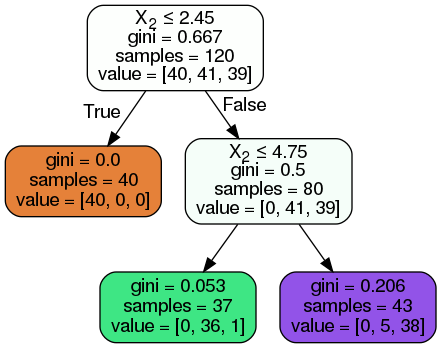

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dec_cls, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())